## GWAS Enrichment
Author: Daniel Nachun and Jenny Empawi

#### Load libriaries

In [16]:
library(tidyverse)
library(ggplot2)
library(showtext)
font_add_google("Noto Sans", "Noto Sans")
showtext_auto()

### EADB GWAS Watershed main plot

**Boxplot of GWAS effect size percentiles across different classes of outlier-associated functional rare variants in all genes and AD-relevant genes in the EADB GWAS.**

#### Load data

In [19]:
eadb_main <- read_rds("/restricted/projectnb/xqtl/jaempawi/xqtl/eadb_main.rds") #FIXME

In [43]:
p1 <- ggplot(eadb_main, aes(study, percentile, fill = `Outlier type`)) +
    geom_boxplot() +
    theme_classic() +
    ylab("GWAS effect size percentile") +
    theme(text = element_text(family = "Noto Sans"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size = 24, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 20, color = "black"),
        axis.text.y = element_text(size = 20, color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold"),
        panel.background = element_rect(fill = NA),
        legend.text = element_text(size = 18), 
        legend.title = element_text(size = 20, face = "bold")
    )

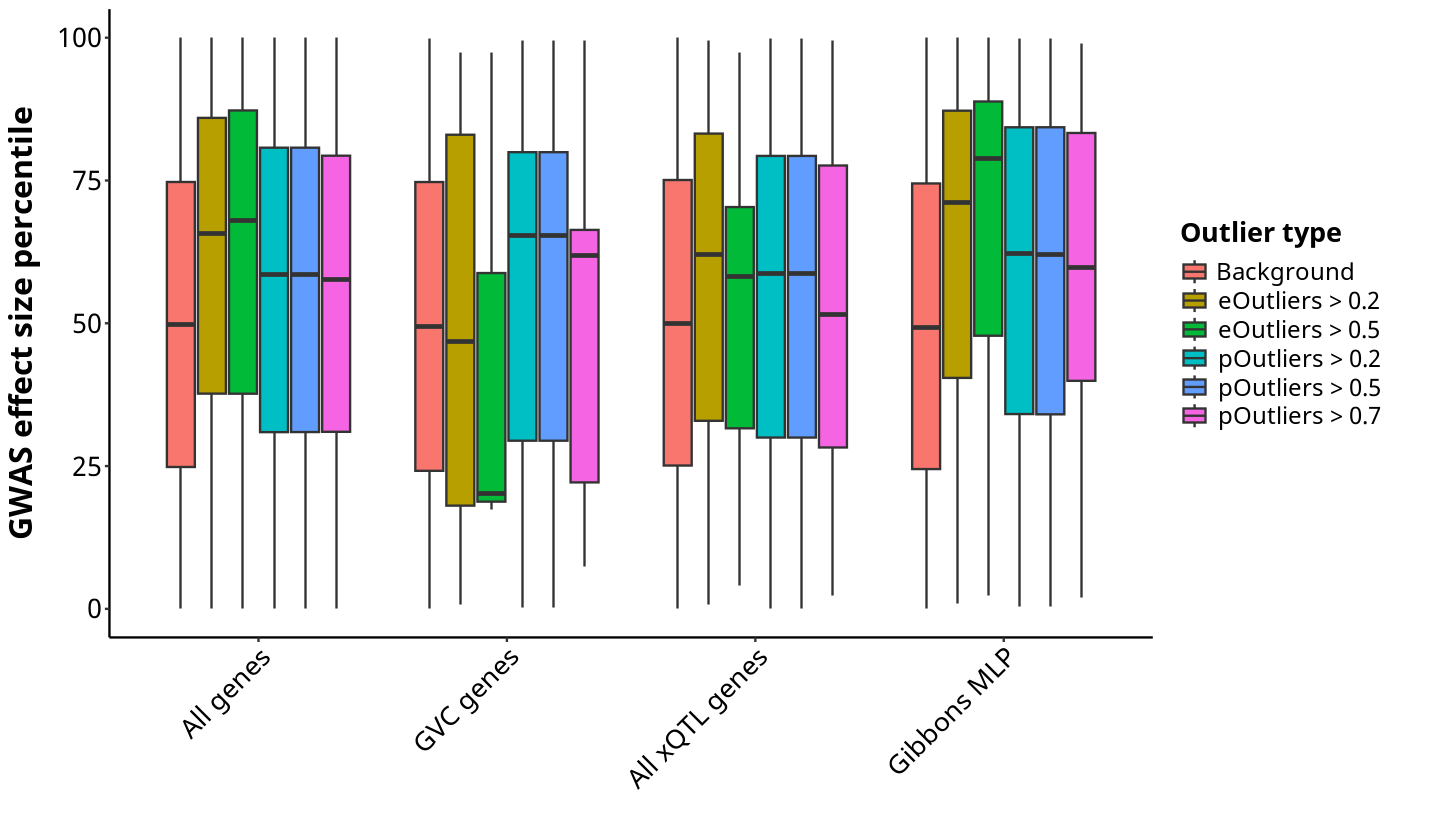

In [56]:
options(repr.plot.width = 12, repr.plot.height = 7)
p1

### Watershed EADB supplementary plot

**Outlier-associated functional rare variants have modestly larger GWAS effect sizes in other AD risk burden test gene sets.** 
 Boxplot of GWAS effect size percentiles across different classes of outlier-associated functional rare variants in all genes and additional AD-relevant genes in the EADB GWAS.

#### Load data

In [45]:
eadb_supplemental <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/eadb_supplemental.rds")  #FIXME

In [51]:
p2 <- ggplot(eadb_supplemental, aes(study, percentile, fill = `Outlier type`)) +
    geom_boxplot() +
    theme_classic() +
    ylab("GWAS effect size percentile") +
    theme(text = element_text(family = "Noto Sans"),
        axis.title.x = element_blank(),
        axis.title.y = element_text(size = 24, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 20, color = "black"),
        axis.text.y = element_text(size = 20, color = "black"),
        strip.background = element_blank(),
        strip.text = element_text(face = "bold"),
        panel.background = element_rect(fill = NA),
        legend.text = element_text(size = 18), 
        legend.title = element_text(size = 20, face = "bold")
    )

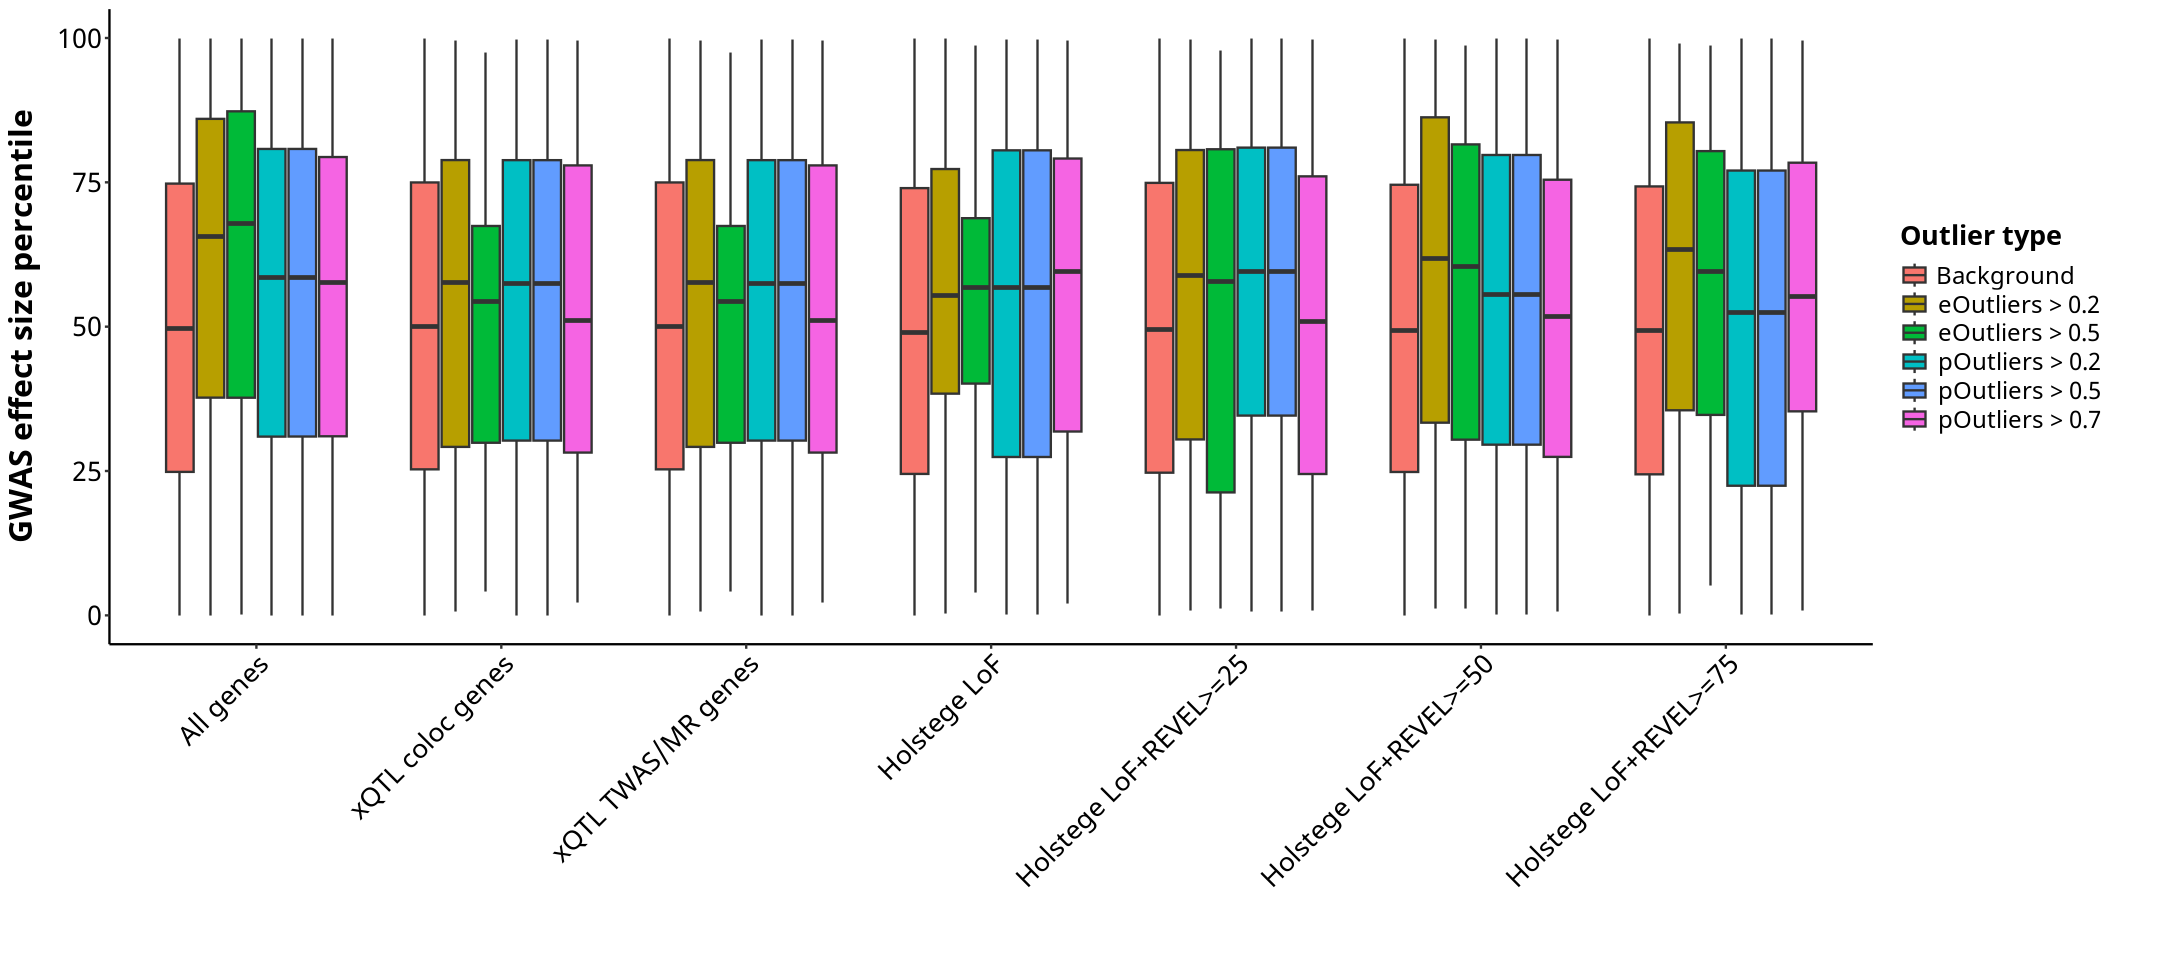

In [55]:
options(repr.plot.width = 18, repr.plot.height = 8)
p2

### Calibration plot

**Outlier-associated rare variants have significantly larger GWAS effect sizes in the EADB GWAS in the top 100 to 1000 genes with the highest AD risk burden test scores.**  
Plot of -log<sub>10</sub> p-values for a linear model comparing outlier-associated functional rare variants to background variants.

#### Load data

In [57]:
calibration_df <- readRDS("/restricted/projectnb/xqtl/jaempawi/xqtl/calibration_df.rds") #FIXME

In [109]:
p3 <- ggplot(calibration_df, aes(set_size, logp, group = `Outlier type`, color = `Outlier type`)) +
    facet_wrap(~ study, scales = "free_x") +
    geom_point() +
    geom_line() +
    theme_classic() +
    xlab("Number of top genes") +
    ylab(expression(bold(-log[10]~"p-value"))) + 
    scale_x_continuous(breaks = seq(100, 1000, 100)) +
    theme(
        text = element_text(family = "Noto Sans"),
        panel.background = element_rect(fill = NA),
        strip.background = element_blank(),
        strip.text = element_text(size = 20, color = "black"),
        axis.text.x = element_text(size = 16, color = "black"),
        axis.text.y = element_text(size = 20, color = "black"),
        axis.title.x = element_text(size = 24, face = "bold"),
        axis.title.y = element_text(size = 24, face = "bold", color = "black"),
        legend.text = element_text(size = 18), 
        legend.title = element_text(size = 20, face = "bold"),
        legend.position = c(0.95, 0.05),
        legend.justification = c(1, 0)
    )

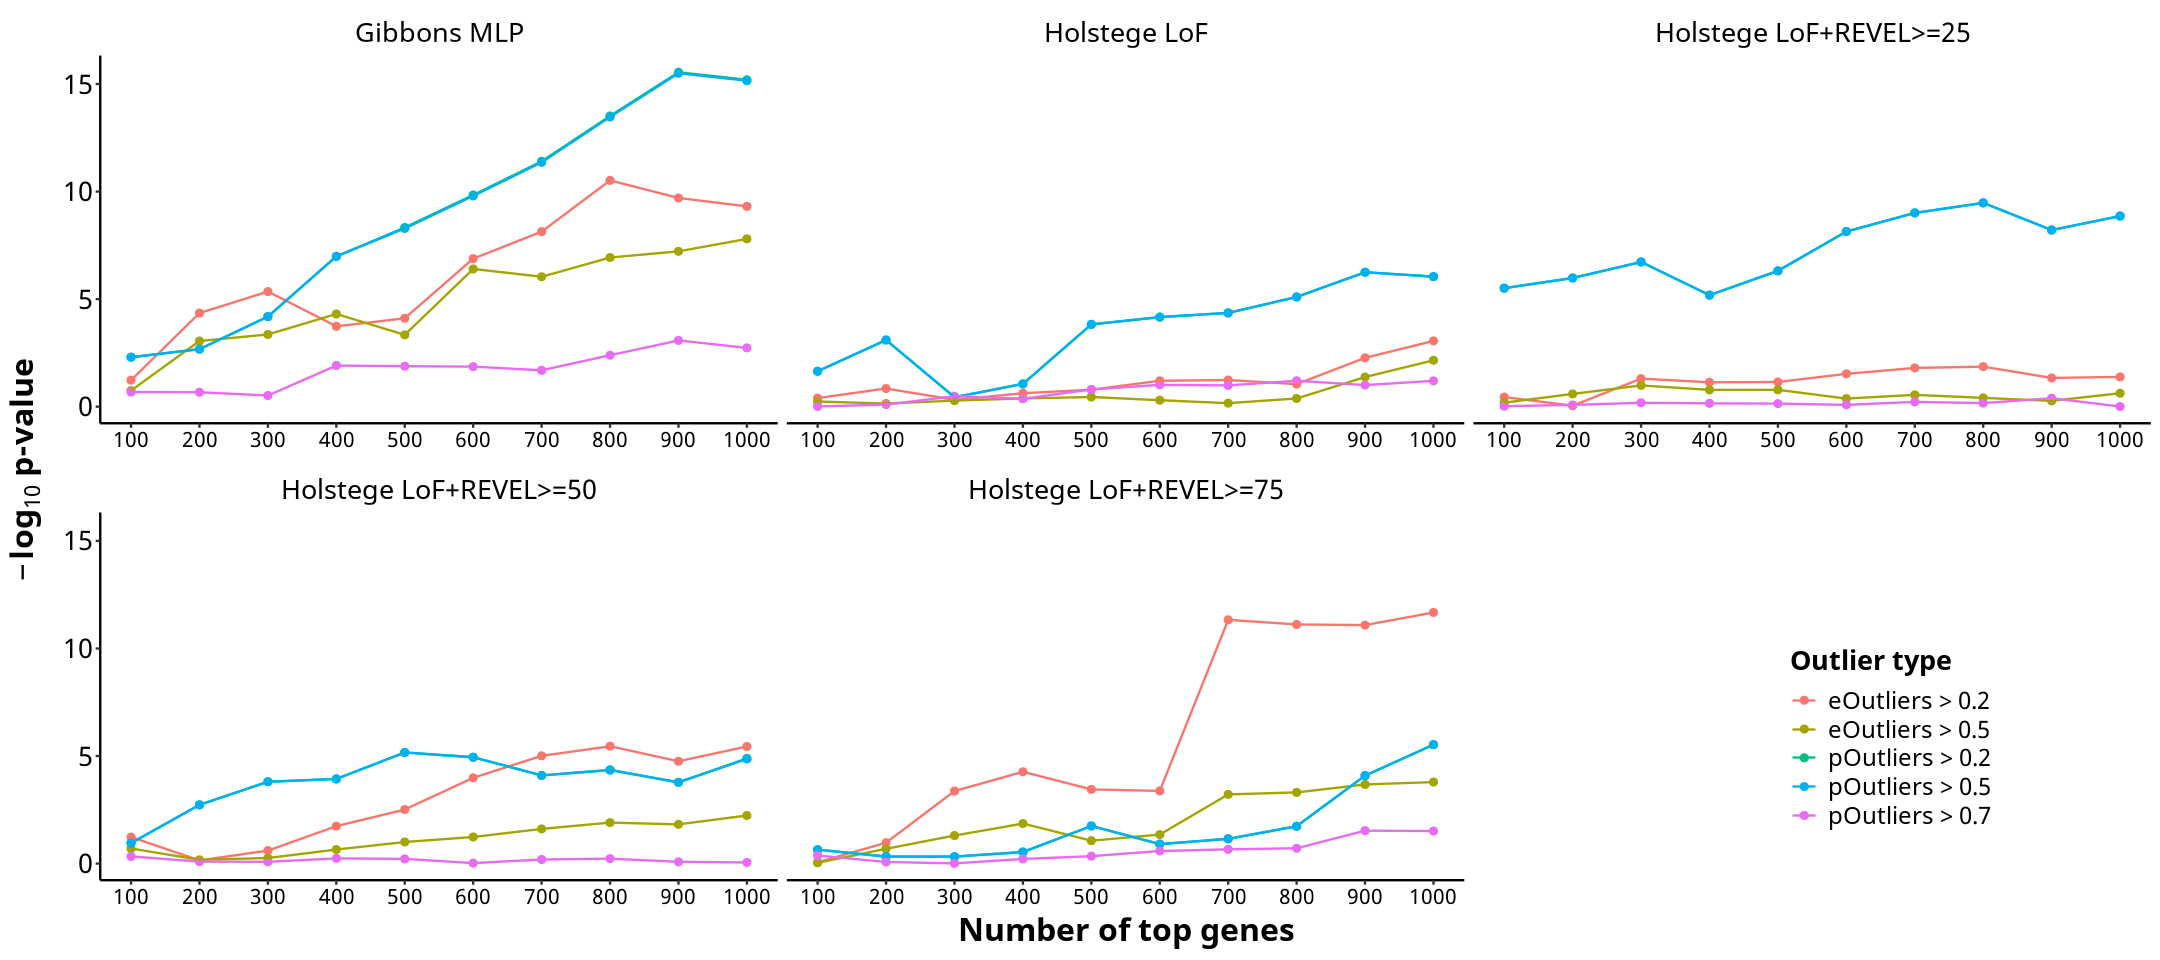

In [110]:
options(repr.plot.width = 18, repr.plot.height = 8)
p3